<h3>Use minmaxscaler when you know the exact range of imput data like rgb photo data (range 0 to 255)</h3>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ptl

In [17]:
df = pd.read_csv("wine_data.csv",names=["class lable","Alcohol","Malic acid"],usecols=[0,1,2])

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("class lable",axis=1),df["class lable"],test_size=0.2,random_state=0)

In [26]:
minmaxtrn = ColumnTransformer(
    transformers=[
        ("minmax",MinMaxScaler(),[0,1])
    ],
    remainder="passthrough"
)
model = KNeighborsClassifier(n_neighbors=4)
plp_model = Pipeline(
    steps=[
        ('minmax',minmaxtrn),
        ('model',model)
    ]
)

plp_model.fit(x_train,y_train)

Pipeline(steps=[('minmax',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  [0, 1])])),
                ('model', KNeighborsClassifier(n_neighbors=4))])

In [28]:
ans = plp_model.predict(x_test)
accuracy_score(ans,y_test)

0.9166666666666666

************************* RobustScaling *************************
<br>
Formula = ans = x - xMedian / IQR( 75 percentile - 25 percentile)

<h3>It is use there is data which input has so many outliers </h3>

***** MaxabsScaling ***********<br>
Formula :-  ans = x / abs(xMax)

<h3>We can use it on a data where sparse imput values are the (sparse means the data where Zeros/0 bohot he)</h3>

<h3>RobustScaling</h3>

In [190]:
new_data = pd.DataFrame({
    'Alcohol': [30.10, 40.10, 25.10],
    'Malic acid': [20.12, 30.12, 15.12]
})
x_train = pd.concat([x_train, new_data], ignore_index=True)
rs = RobustScaler()
x_Rbust = pd.DataFrame(rs.fit_transform(x_train))
x_Rbust.describe()

,0,1
count,163.000000,163.000000
mean,1.525676,1.269911
std,4.665232,3.171655
min,-1.501730,-0.609091
25%,-0.539792,-0.195455
50%,0.000000,0.000000
75%,0.460208,0.804545
max,18.615917,12.745455


<Axes: ylabel='Density'>

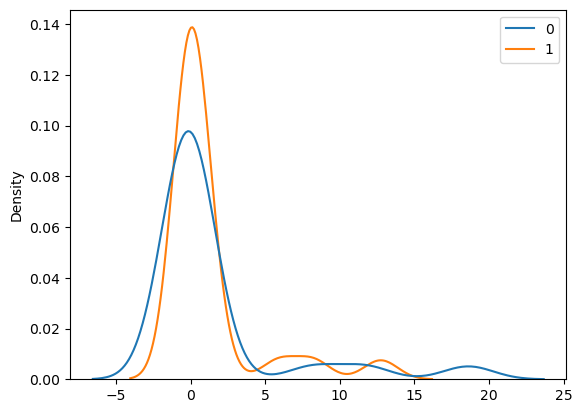

In [192]:
x_train.describe()
sns.kdeplot(x_Rbust)

<Axes: ylabel='Density'>

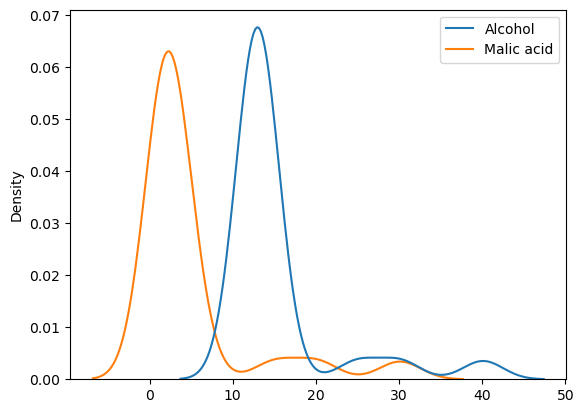

In [193]:
sns.kdeplot(x_train)